<a href="https://colab.research.google.com/github/reifeitan/Hello_World/blob/master-branch/IMDB/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMDB Dataset

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv('IMDB-Movie-Data.csv')
df.rename(columns={'Runtime (Minutes)' : 'Runtime_mins', 'Revenue (Millions)' : 'Rev_M'}, inplace=True)


In [27]:
df.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_mins,Rating,Votes,Rev_M,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


Checking for Null values.

In [28]:
df.isnull().sum()


Rank              0
Title             0
Genre             0
Description       0
Director          0
Actors            0
Year              0
Runtime_mins      0
Rating            0
Votes             0
Rev_M           128
Metascore        64
dtype: int64

Let's see what we can do for filling Metascore.

In [29]:
df['Rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

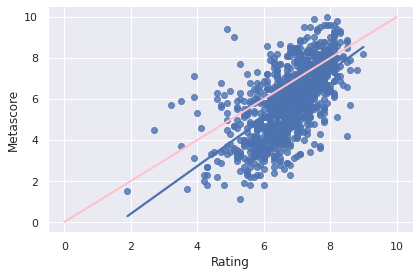

In [31]:
sns.regplot(x='Rating', y=(df['Metascore']/10), data=df, ci=None)
plt.plot([0, 10], [0, 10], linewidth=2,color='pink')
sns.despine()
plt.tight_layout()
plt.show()

So we found some correlation with Rating.
Let's do something about it, first with numpy.

In [24]:
a = df.groupby('Year')['Rating', 'Metascore'].agg(['max', 'min', 'mean', 'std'])
a['mean_dif'] = a.Rating['mean'] - a.Metascore['mean']/10
a = a['mean_dif']
df['Metascore'] /= 10
null_mask = df['Metascore'].isnull()
val = a[df[null_mask]['Year']].to_numpy()
val = val + df[null_mask]['Rating']
df['Metascore'][null_mask] = val
df.isnull().sum()

Rank               0
Title              0
Genre           1000
Description        0
Director           0
Actors             0
Year               0
Runtime_mins       0
Rating             0
Votes              0
Rev_M            128
Metascore          0
dtype: int64

Pandas trival way of applying a change to every row

In [ ]:
def metascorefilling(year, rating):
    value = a.loc[year, 'mean_dif'] + rating
    if value > 10:
        return 10
    else:
        return value

df['Metascore'] = df.apply(lambda x: metascorefilling(x['Year'], x['Rating']) if np.all(pd.isnull(x['Metascore'])) else x['Metascore']/10, axis=1)

Moving on the Revenue Null values.


Genre is a little tricky (and a special thanks to Medium bloggers :)
Let's manipulate it so we could have some insights about it.

In [40]:
df['Genre'] = df['Genre'].str.split(",")
new_df = df.explode('Genre')
new_df.replace('^\s+', '', regex=True, inplace=True)
new_df.replace('\s+$', '', regex=True, inplace=True)
new_df.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_mins,Rating,Votes,Rev_M,Metascore
0,1,Guardians of the Galaxy,Action,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
0,1,Guardians of the Galaxy,Adventure,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
0,1,Guardians of the Galaxy,Sci-Fi,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0


Now we can check what Genre is the most time consuming.

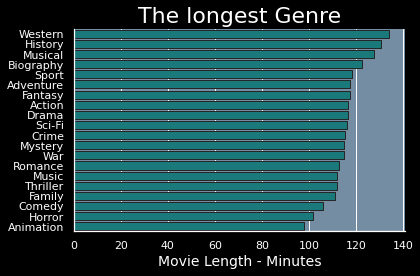

In [36]:
sns.set(rc={'axes.facecolor':'xkcd:blue/grey', 'figure.facecolor':'xkcd:black'})
ndf_grp = new_df.groupby('Genre')['Runtime_mins'].mean().sort_values(ascending=False)
ax = sns.barplot(x=ndf_grp.values, y= ndf_grp.index, orient='h', color='xkcd:dark cyan',edgecolor="0.15")
plt.xlabel('Movie Length - Minutes', size=14, color='white')
plt.ylabel("", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.title("The longest Genre", size=22, color='white')
sns.despine()
plt.tight_layout()
plt.show()

Which Genre has the highest rating? <br>
Submission? Madness? THIS IS SPARTA

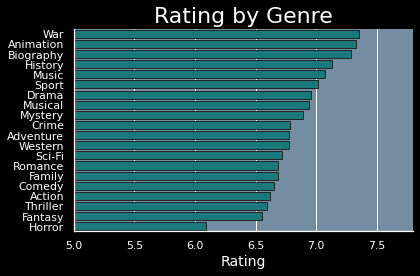

In [43]:
new_df.groupby('Genre')['Rating', 'Metascore'].mean().sort_values('Rating', ascending=False) 
ndf_grp = new_df.groupby('Genre')['Rating', 'Metascore'].mean().sort_values('Rating', ascending=False)
ndf_grp['Diff'] = ndf_grp['Rating'] - ndf_grp['Metascore']

sns.set(rc={'axes.facecolor':'xkcd:blue/grey', 'figure.facecolor':'xkcd:black'})
a = sns.barplot(ndf_grp.Rating, ndf_grp.index, orient='h', color='xkcd:dark cyan',edgecolor="0.15" )
a.set(xlim=(5, 7.8))
labels = [5, 5.5, 6, 6.5, 6.6, 6.7, 6.8, 6.9,7, 7.5]
plt.xlabel('Rating', size=14, color='white')
plt.ylabel("")
plt.title("Rating by Genre", size=22, color='white')
sns.despine()
plt.xticks(color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()

Who has the most appearances on the list?

In [44]:
df['Actors'] = df['Actors'].str.split(",")
new_df2 = df.explode('Actors').explode('Genre')
new_df2.replace('^\s+', '', regex=True, inplace=True)
new_df2.replace('\s+$', '', regex=True, inplace=True)

new_df2["Actors_count"] = new_df2.apply(lambda x: x['Actors'] + str(x['Rank']), axis=1)
new_df2.drop_duplicates('Actors_count', inplace=True)

new_df2['Actors'].value_counts().head(20)

Mark Wahlberg         15
Hugh Jackman          14
Brad Pitt             13
Christian Bale        13
Scarlett Johansson    12
Tom Hardy             12
Michael Fassbender    12
Robert Downey Jr.     12
Johnny Depp           12
Anne Hathaway         12
Channing Tatum        12
Bradley Cooper        11
Gerard Butler         11
Cate Blanchett        11
Anna Kendrick         11
Jake Gyllenhaal       11
Shia LaBeouf          11
Chloë Grace Moretz    11
Seth Rogen            11
Jennifer Lawrence     11
Name: Actors, dtype: int64

What about their movie gross revenue?

In [45]:
new_df2.groupby(['Actors'])['Rev_M'].sum().sort_values(ascending=False).head(20)

Actors
Robert Downey Jr.     3147.37
Jennifer Lawrence     2191.82
Chris Evans           1949.01
Scarlett Johansson    1874.97
Johnny Depp           1789.20
Shia LaBeouf          1695.93
Christian Bale        1653.19
Anne Hathaway         1647.47
Liam Hemsworth        1641.60
Dwayne Johnson        1598.09
Josh Hutcherson       1578.45
Zoe Saldana           1542.68
Chris Pratt           1532.38
Mark Wahlberg         1497.98
Bradley Cooper        1490.76
Hugh Jackman          1468.98
Will Smith            1400.80
Emma Watson           1388.85
Jeremy Renner         1377.82
Vin Diesel            1356.02
Name: Rev_M, dtype: float64

And what about the Directors?

In [50]:
df['Director'].value_counts().head(10)

Ridley Scott          8
David Yates           6
Paul W.S. Anderson    6
Michael Bay           6
M. Night Shyamalan    6
Zack Snyder           5
Woody Allen           5
David Fincher         5
Antoine Fuqua         5
J.J. Abrams           5
Name: Director, dtype: int64

In [53]:
df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)

Director
Nitesh Tiwari                       8.80
Christopher Nolan                   8.68
Makoto Shinkai                      8.60
Olivier Nakache                     8.60
Aamir Khan                          8.50
Florian Henckel von Donnersmarck    8.50
Naoko Yamada                        8.40
Damien Chazelle                     8.40
Lee Unkrich                         8.30
S.S. Rajamouli                      8.30
Name: Rating, dtype: float64

In [52]:
df.groupby('Director')['Rev_M'].mean().sort_values(ascending=False).head(10)

Director
James Cameron      760.510
Colin Trevorrow    652.180
Joss Whedon        541.135
Lee Unkrich        414.980
Gary Ross          408.000
Chris Buck         400.740
Chris Renaud       368.310
Gareth Edwards     366.415
Tim Miller         363.020
Byron Howard       341.260
Name: Rev_M, dtype: float64

Some intersting other stuff

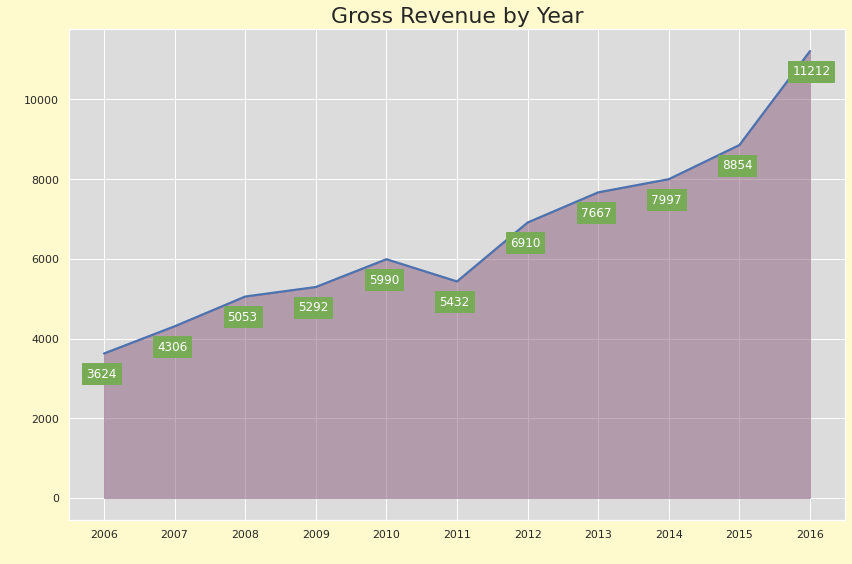

In [46]:
avgrev = df.groupby('Year')['Year', 'Rev_M'].agg({'Year' : 'count', 'Rev_M' : 'mean'}).rename(columns={'Year' : 'Total_movies', 'Rev_M' : 'AVG_Rev'}).reset_index()
a = df.groupby('Year')['Rev_M'].sum().reset_index()
sns.set(rc={'axes.facecolor':'gainsboro', 'figure.facecolor':'lemonchiffon'})
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Gross Revenue by Year', size=22)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
sns.lineplot(data=a, x='Year', y='Rev_M', lw=2.2,ax=ax )
ax.set(xticks=a.Year)
plt.fill_between(a['Year'], a['Rev_M'], color="xkcd:dusky purple", alpha=0.5)
for x, y in zip(a['Year'], a['Rev_M']):
    # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    plt.text(x= x-.25, # x-coordinate position of data label
    y= y-600, # y-coordinate position of data label, adjusted to be 150 below the data point
    s= '{:.0f}'.format(y), # data label, formatted to ignore decimals
    color= 'xkcd:green') # set colour of line
    plt.text(x-.25, y-600, '{:.0f}'.format(y), color='white').set_backgroundcolor('xkcd:asparagus')
plt.tight_layout()
plt.show()

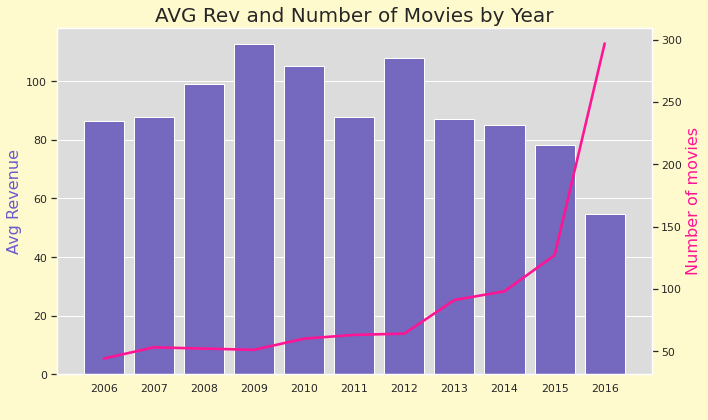

In [47]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('AVG Rev and Number of Movies by Year', fontsize=20)
ax1 = sns.barplot(data=avgrev, x='Year', y='AVG_Rev', color='slateblue')
ax1.set_xlabel(' ', fontsize=16)
ax1.set_ylabel('Avg Revenue', fontsize=16, color='slateblue')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel('Number of movies', fontsize=16, color='deeppink')
ax2 = sns.lineplot(data=avgrev, x=avgrev.index, y='Total_movies', sort=False, lw=2.6, color='deeppink')
ax2.tick_params(axis='y')
ax2.grid(False)
plt.tight_layout()
plt.show()

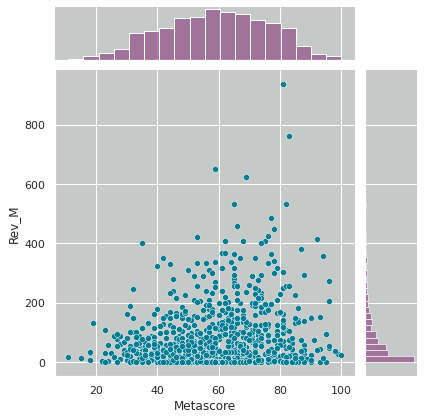

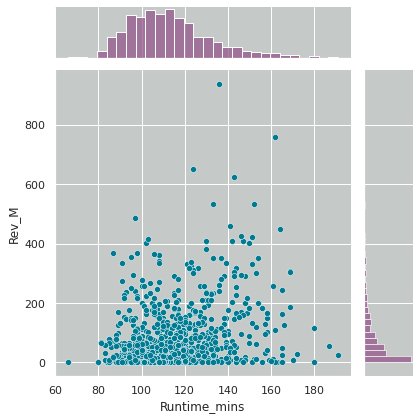

In [49]:
sns.set(rc={'axes.facecolor':'xkcd:silver'})

sns.jointplot(data=df, x='Metascore', y='Rev_M', marginal_kws={'color': 'xkcd:purplish'}, joint_kws={'color': 'xkcd:ocean'})
sns.jointplot(data=df, x='Runtime_mins', y='Rev_M', marginal_kws={'color': 'xkcd:purplish'}, joint_kws={'color': 'xkcd:ocean'})
plt.tight_layout()
plt.show()